```shell
conda create --name pangu python=3.10
conda activate pangu

conda install numpy pandas cartopy matplotlib
conda install pytorch torchvision torchaudio pytorch-cuda=12.4 -c pytorch -c nvidia
pip install --upgrade pip

conda install pytorch torchvision torchaudio pytorch-cuda=12.0 -c pytorch -c nvidia
conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia
pip install onnx onnxruntime-gpu
python3 -m pip install nvidia-cudnn-cu12==9.5.1.17

conda install -c conda-forge nco
conda install -c conda-forge xarray==2024.9.0 dask netCDF4 bottleneck
conda install -c conda-forge notebook
```

Documentation: https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/doc/IBTrACS_v04r01_column_documentation.pdf

In [1]:
import requests
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def download(url):
    # Local filename to save the file
    filename = url.split('/')[-1]

    # Download the file
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
            print(f"File downloaded as {filename}")
        return filename
    else:
        print(f"Failed to download file: {response.status_code}")
    

# IBTrACS

In [53]:
# URL of the netCDF file
url = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/netcdf/IBTrACS.ALL.v04r01.nc"
fname = download(url)
ds = xr.open_dataset(fname)
print(ds)

File downloaded as IBTrACS.ALL.v04r01.nc
<xarray.Dataset> Size: 4GB
Dimensions:           (storm: 13413, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] 39MB ...
    lat               (storm, date_time) float32 19MB ...
    lon               (storm, date_time) float32 19MB ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/159)
    numobs            (storm) float32 54kB ...
    sid               (storm) |S13 174kB ...
    season            (storm) float32 54kB ...
    number            (storm) int16 27kB ...
    basin             (storm, date_time) |S2 10MB ...
    subbasin          (storm, date_time) |S2 10MB ...
    ...                ...
    reunion_gust      (storm, date_time) float32 19MB ...
    reunion_gust_per  (storm, date_time) float32 19MB ...
    usa_seahgt        (storm, date_time) float32 19MB ...
    usa_searad        (storm, date_time, quadrant) float32 77MB ...
    storm_speed       (stor

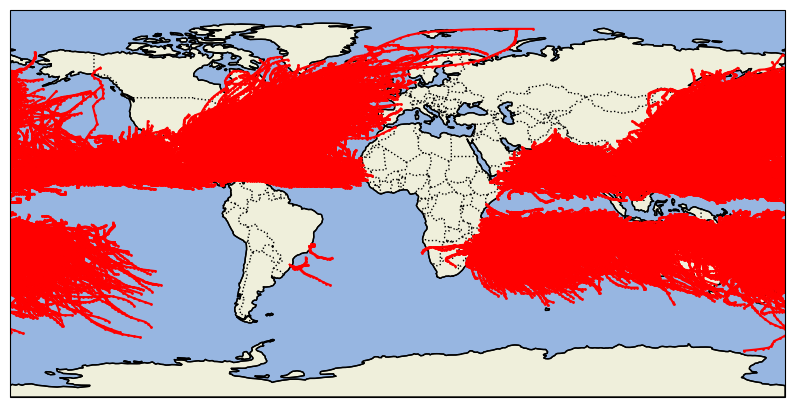

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for i in range(len(ds['storm'])):
        st = ds.sel(storm=i)
        lat = st['lat'].values
        lon = st['lon'].values
        n = min(np.isnan(lat).sum(), np.isnan(lon).sum())
        lat = lat[:n]
        lon = lon[:n]
        ax.plot(lon, lat, marker='o', markersize=1, color='red', transform=ccrs.PlateCarree(), 
                label="Storm Path")

fig

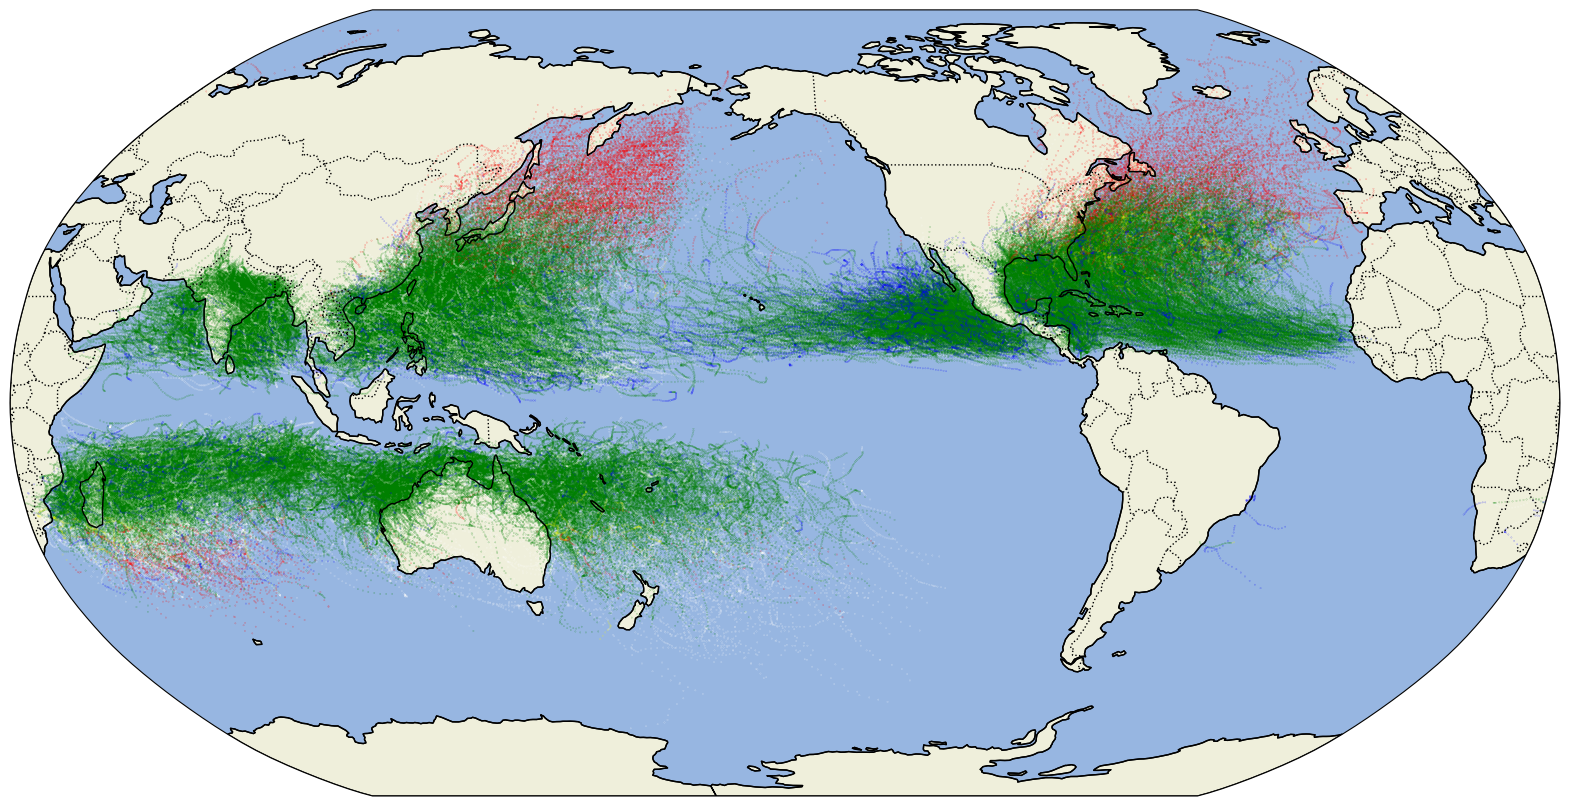

In [45]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

fig = plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.Robinson(-150))
ax.set_global()
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

colors = {b'DS': 'blue',
          b'TS': 'green',
          b'ET': 'red',
          b'SS': 'yellow',
          b'NR': 'white',
          b'MX': 'white'}
colorfunc = np.vectorize(colors.get)

for i in range(len(ds['storm'])):
        st = ds.sel(storm=i)
        # if st['season'].values.item() != 2005.0:
        #         continue
        lat = st['lat'].values
        lon = st['lon'].values
        n = min(np.isnan(lat).sum(), np.isnan(lon).sum())
        lat = lat[:n]
        lon = lon[:n]
        nature = st['nature'].values
        nature = nature[:len(lon)]
        
        if len(lon)<1:
                print('skip')
                continue
        
        natcols= colorfunc(nature)
        ax.scatter(lon, lat, marker='o', s=0.01, c=natcols, transform=ccrs.PlateCarree(0), 
                label="Storm Path")

fig

# Occluded-ETC

In [ ]:
%%capture
fname = download('https://portal.nccs.nasa.gov/datashare/Obs-ETC/Occluded-ETC/Occlusions200609.tgz')
print(fname)
!tar -xzvf Occlusions200609.tgz